# Step-1: Data Generation and Collection

In [111]:
# Load synthetic data
import pandas as pd

# Replace 'file_path' with the actual path to your Excel file
file_path = r'C:\Users\basha\Downloads\Updated Ultra Projects- Data Science.xlsx'

# Load data into a DataFrame
df = pd.read_excel(file_path, sheet_name='Project 2 ')

# Display the DataFrame
print(df.head())




        Date  Store ID  Item ID     Item Category  Sales Volume  \
0 2023-01-05         1     1009  Sports & Outdoor           130   
1 2023-01-05         2     1010       Electronics           160   
2 2023-01-06         1     1011          Clothing            85   
3 2023-01-06         2     1012   Beauty & Health            60   
4 2023-01-07         1     1013    Home & Kitchen           210   

  Promotional Flags  
0                No  
1               Yes  
2                No  
3               Yes  
4                No  


# Step-2: Data Preprocessing

In [112]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.dropna(inplace=True)

# Handle outliers (optional)
# For example, you can use z-score to detect and remove outliers

# Example:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Sales Volume']))
threshold = 3
df = df[(z_scores < threshold)]


Date                 0
Store ID             0
Item ID              0
Item Category        0
Sales Volume         0
Promotional Flags    0
dtype: int64


# Step 3: Exploratory Data Analysis (EDA)

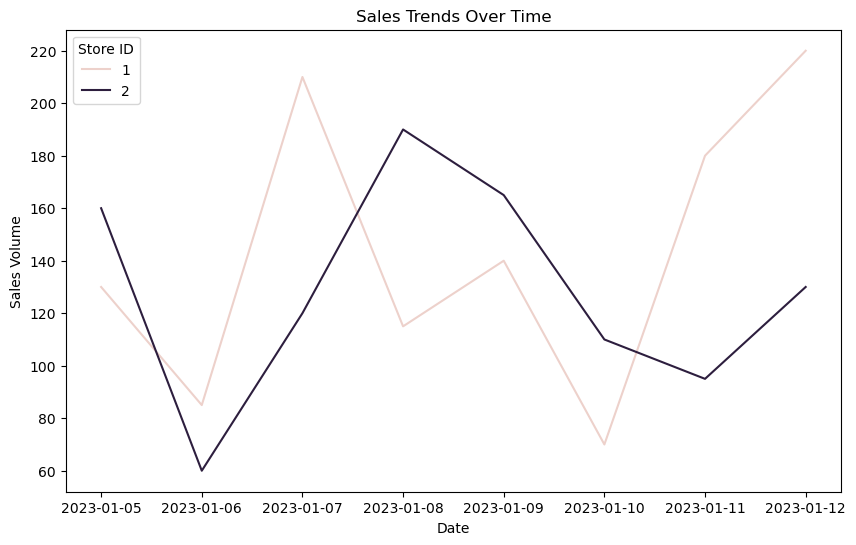

In [114]:
import warnings
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Suppress FutureWarnings during visualization
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Visualize sales trends over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Sales Volume', hue='Store ID')
    plt.title('Sales Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend(title='Store ID')
    plt.show()



# Step 4: Feature Engineering

In [116]:
# Create time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Create holiday flags (if applicable)
# Example: Check if the date is a holiday
# You can use external libraries or datasets for holiday information

# Encode categorical variables
# Example: Convert 'Promotional Flags' to binary encoding
df['Promotional Flags'] = df['Promotional Flags'].map({'Yes': 1, 'No': 0})


# Step 5: Model Development

In [122]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

# One-hot encode categorical features
X_encoded = pd.get_dummies(df[['Store ID', 'Item ID', 'Item Category', 'Promotional Flags']], drop_first=True)

# **Check for missing encoded columns**
print(X_encoded.columns)  # Verify if encoded flag column is present

# Adjust features_of_interest based on the actual encoded column names
features_of_interest = ['Store ID', 'Item ID', 'Promotional Flags_True' if 'Promotional Flags_True' in X_encoded.columns else 'Promotional_Flag_1',  # Adjusted for encoded names
                         'Item Category_Clothing', 'Item Category_Electronics',
                         'Item Category_Home & Kitchen', 'Item Category_Sports & Outdoor',
                         'Item Category_Toys & Games']

# Assuming 'Sales Volume' is the target column
y = df['Sales Volume']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fill missing values with the next valid observation (bfill)
X_train.fillna(method='bfill', inplace=True)
X_test.fillna(method='bfill', inplace=True)

# Convert train and test data to NumPy arrays
X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
y_train_arr = y_train.to_numpy()

# Replace NaN values in arrays with 0
X_train_arr = np.nan_to_num(X_train_arr)
X_test_arr = np.nan_to_num(X_test_arr)

# Create a constant exogenous variable
constant_exog_train = np.ones((X_train_arr.shape[0], 1))
constant_exog_test = np.ones((X_test_arr.shape[0], 1))

# Train ARIMA model (replace with your chosen model if needed)
order = (1, 1, 1)  # Example ARIMA order, adjust as necessary
model = ARIMA(endog=y_train_arr, exog=constant_exog_train, order=order)
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=len(X_test), exog=constant_exog_test)


Index(['Store ID', 'Item ID', 'Promotional Flags', 'Item Category_Clothing',
       'Item Category_Electronics', 'Item Category_Home & Kitchen',
       'Item Category_Sports & Outdoor', 'Item Category_Toys & Games'],
      dtype='object')


# Step 6: Model Evaluation and Tuning

In [123]:
# Print the previously calculated Mean Squared Error
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2170.7012724485335


# Step 7: Visualization and Reporting

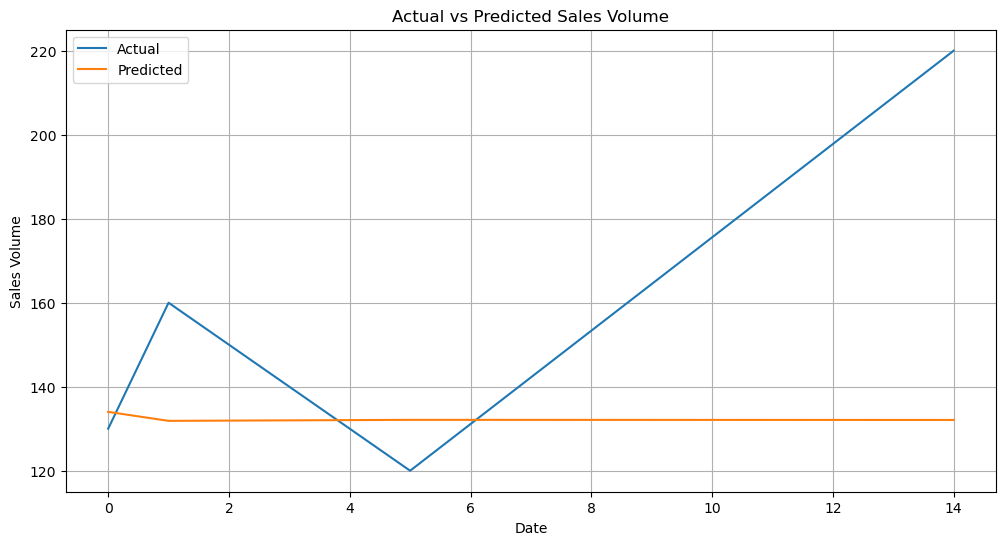

In [124]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted sales volume
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Actual vs Predicted Sales Volume')
plt.legend()
plt.grid(True)
plt.show()


# SHAP

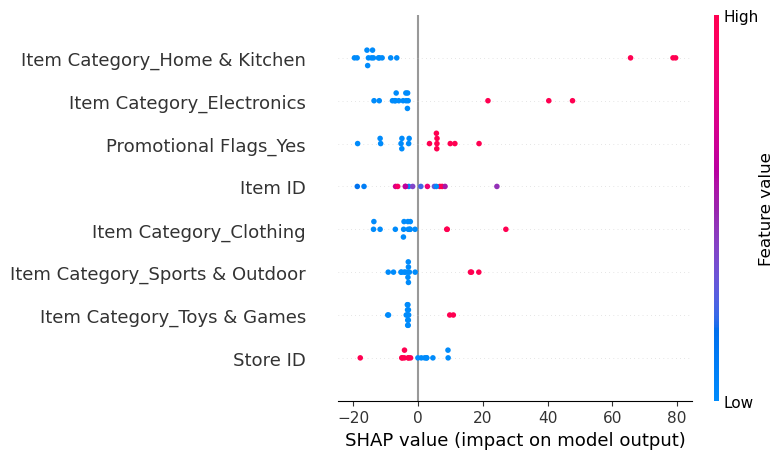

In [130]:
import pandas as pd
import xgboost as xgb
import shap

# Replace 'file_path' with the actual path to your Excel file
file_path = r'C:\Users\basha\Downloads\Updated Ultra Projects- Data Science.xlsx'

# Load data into a DataFrame
df = pd.read_excel(file_path, sheet_name='Project 2 ')


# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[['Store ID', 'Item ID', 'Item Category', 'Promotional Flags']], drop_first=True)

# Split data into features and target
X = df_encoded
y = df['Sales Volume']

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

# SHAP Explanation
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)

# Visualize SHAP values
shap.summary_plot(shap_values, X)


# LIME

In [142]:
import pandas as pd
import xgboost as xgb
from lime import lime_tabular

# Load data into a DataFrame
file_path = r'C:\Users\basha\Downloads\Updated Ultra Projects- Data Science.xlsx'
df = pd.read_excel(file_path, sheet_name='Project 2 ')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[['Store ID', 'Item ID', 'Item Category', 'Promotional Flags']], drop_first=True)

# Split data into features and target
X = df_encoded
y = df['Sales Volume']

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

# Initialize the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X.values, mode='regression', feature_names=X.columns)

# Choose a sample to explain
sample_idx = 0

# Explain the prediction
explanation = explainer.explain_instance(X.values[sample_idx], model.predict)

# Visualize the explanation
explanation.show_in_notebook()
